In [1]:
%matplotlib inline
from math import floor, log10

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# X axis
L = 10
dx = 1
Nx = int(L/dx)

In [3]:
# Y axis
T = 24 * 60 * 60 # period is 24 hours
dt = 60 * 60 # step is 1 hour
Nt = int(T/dt)

24

In [4]:
k = 10 * 10**(-15)
mu = 0.005
B = 10**(-9)

Xi = k / (mu*B)
Xi

0.002

In [5]:
M = np.zeros((Nx+1, Nt+1), dtype=np.int)

Добавляем граничные условия.

In [6]:
from utils import scientific_notation as sci_not # local utils

for i in range(0, Nx+1, dx):
    M[i, 0] = float(10 * 10**5)

for j in range(0, Nt+1):
    M[0, j] = float(10*10**5)
    M[Nx, j] = float(20*10**5)


format_sc_n = lambda x: "{:1.0e}".format(x) if x > 1000 else x # scientific notation

df = pd.DataFrame(M, dtype=int)
df = df.applymap(formatw)
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,...,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06,1e+06
1,1e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Рассчитываем коэффициенты в матрице:

In [7]:
# zero matrix for further calculations
A = np.zeros((Nx+1, Nx+1), dtype=np.int)

# we started with 1 and stopped on 9 here
for i in range(1, Nx):
    A[i,i] = (2*dt/dx**2) * Xi + 1
    A[i, i+1] = (-dt/dx**2)*Xi
    A[i, i-1] = (-dt/dx**2)*Xi

A[0,0] = 1
A[Nx, Nx] = 1

#### Матрица коэффициентов будет иметь вид:

In [8]:
pd.DataFrame(A, dtype=float)

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-7.0,15.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-7.0,15.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,-7.0,15.0,-7.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,-7.0,15.0,-7.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,-7.0,15.0,-7.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,-7.0,15.0,-7.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,-7.0,15.0,-7.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.0,15.0,-7.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.0,15.0,-7.0


In [9]:
test = np.array([
    [1, 1, -1],
    [2, -1, 1],
    [-1, 2, 2]
])

np.linalg.solve(test, [-2, 5, 1])

array([ 1., -1.,  2.])

Решаем системы уравнений на каждом временном шаге

In [10]:
for j in range(1, Nt+1):
    M[:, j] = np.linalg.solve(A, M[:, j-1])

pd.set_option('display.max_columns', None)
result = pd.DataFrame(M, dtype=float)
result = result.applymap(lambda x: "{:1.3e}".format(x))
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06,1.000e+06
1,1.000e+06,1.018e+06,1.042e+06,1.062e+06,1.077e+06,1.086e+06,1.092e+06,1.095e+06,1.097e+06,1.098e+06,1.099e+06,1.099e+06,1.100e+06,1.100e+06,1.100e+06,1.100e+06,1.100e+06,1.100e+06,1.100e+06,1.100e+06,1.100e+06,1.100e+06,1.100e+06,1.100e+06,1.100e+06
2,1.000e+06,1.038e+06,1.088e+06,1.128e+06,1.156e+06,1.173e+06,1.184e+06,1.190e+06,1.194e+06,1.197e+06,1.198e+06,1.199e+06,1.199e+06,1.200e+06,1.200e+06,1.200e+06,1.200e+06,1.200e+06,1.200e+06,1.200e+06,1.200e+06,1.200e+06,1.200e+06,1.200e+06,1.200e+06
3,1.000e+06,1.065e+06,1.140e+06,1.199e+06,1.238e+06,1.263e+06,1.278e+06,1.287e+06,1.292e+06,1.295e+06,1.297e+06,1.298e+06,1.299e+06,1.299e+06,1.300e+06,1.300e+06,1.300e+06,1.300e+06,1.300e+06,1.300e+06,1.300e+06,1.300e+06,1.300e+06,1.300e+06,1.300e+06
4,1.000e+06,1.100e+06,1.203e+06,1.278e+06,1.327e+06,1.356e+06,1.374e+06,1.384e+06,1.391e+06,1.395e+06,1.397e+06,1.398e+06,1.399e+06,1.399e+06,1.400e+06,1.400e+06,1.400e+06,1.400e+06,1.400e+06,1.400e+06,1.400e+06,1.400e+06,1.400e+06,1.400e+06,1.400e+06
5,1.000e+06,1.149e+06,1.282e+06,1.369e+06,1.422e+06,1.454e+06,1.472e+06,1.484e+06,1.490e+06,1.494e+06,1.497e+06,1.498e+06,1.499e+06,1.499e+06,1.500e+06,1.500e+06,1.500e+06,1.500e+06,1.500e+06,1.500e+06,1.500e+06,1.500e+06,1.500e+06,1.500e+06,1.500e+06
6,1.000e+06,1.220e+06,1.379e+06,1.471e+06,1.525e+06,1.556e+06,1.574e+06,1.584e+06,1.591e+06,1.595e+06,1.597e+06,1.598e+06,1.599e+06,1.599e+06,1.600e+06,1.600e+06,1.600e+06,1.600e+06,1.600e+06,1.600e+06,1.600e+06,1.600e+06,1.600e+06,1.600e+06,1.600e+06
7,1.000e+06,1.322e+06,1.498e+06,1.587e+06,1.635e+06,1.662e+06,1.678e+06,1.687e+06,1.692e+06,1.695e+06,1.697e+06,1.698e+06,1.699e+06,1.699e+06,1.700e+06,1.700e+06,1.700e+06,1.700e+06,1.700e+06,1.700e+06,1.700e+06,1.700e+06,1.700e+06,1.700e+06,1.700e+06
8,1.000e+06,1.471e+06,1.643e+06,1.716e+06,1.752e+06,1.772e+06,1.784e+06,1.790e+06,1.794e+06,1.797e+06,1.798e+06,1.799e+06,1.799e+06,1.800e+06,1.800e+06,1.800e+06,1.800e+06,1.800e+06,1.800e+06,1.800e+06,1.800e+06,1.800e+06,1.800e+06,1.800e+06,1.800e+06
9,1.000e+06,1.686e+06,1.813e+06,1.855e+06,1.875e+06,1.885e+06,1.891e+06,1.895e+06,1.897e+06,1.898e+06,1.899e+06,1.899e+06,1.900e+06,1.900e+06,1.900e+06,1.900e+06,1.900e+06,1.900e+06,1.900e+06,1.900e+06,1.900e+06,1.900e+06,1.900e+06,1.900e+06,1.900e+06


[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


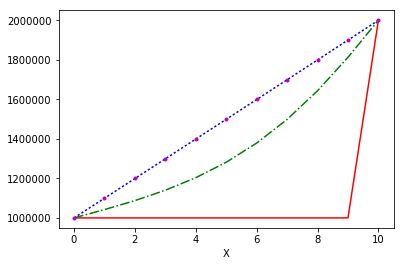

In [108]:
# pd.DataFrame(M[:, i]) # the columns we need
x = np.linspace(0, 10, 11)
plt.xlabel('X')
print(x)
plt.plot(
    x, M[:, 0], 'r-',
    x, M[:, 2], 'g-.',
    x, M[:, int(Nt/2)], 'b:',
    x, M[:, int(Nt)], 'm.',
)
plt.show()